In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset
import matplotlib.pyplot as plt  # 맷플롯립사용
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import random
from sklearn.datasets import load_digits



--- 
 - 다층 퍼셉트론으로 손글씨 분류하기 
   - 이번 챕터에서는 다층 퍼셉트론을 구현하고, 딥 러닝을 통해서 숫자 필기 데이터를 분류해봅시다. 
   - MNIST 데이터랑 다른 데이터입니다. 


--- 
 - 숫자 필기 데이터 소개 
   - 숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 
   - 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 
   - 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 
   - 그리고 해당 이미지가 1,797개가 있습니다. 
   - load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 
   - 로드한 전체 데이터를 digits에 저장합니다. 


len(digits.images) : 1797


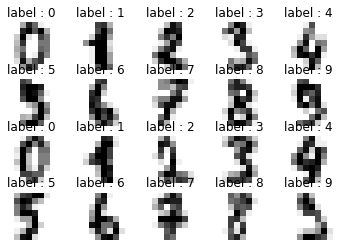

In [2]:


digits = load_digits()
mu.log("len(digits.images)", len(digits.images))

images_labels = list(zip(digits.images, digits.target))
sub_sample_size = 20

for i, (image, label) in enumerate(images_labels[:sub_sample_size]):
    plt.subplot(4, 5, i + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("label : {}".format(label))

plt.show()



--- 
 - 다층 퍼셉트론 분류기 만들기 



model : 
    Sequential(
      (0): Linear(in_features=64, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=True)
      (3): ReLU()
      (4): Linear(in_features=16, out_features=10, bias=True)
    ) 
    torch.Size([32, 64]) tensor([[-0.0496,  0.0519, -0.1037,  ...,  0.0618,  0.0088, -0.0568],
            [-0.0658, -0.0821,  0.0512,  ..., -0.0864,  0.0827, -0.0021],
            [-0.0212,  0.0938, -0.0333,  ..., -0.0707, -0.1192,  0.1248],
            ...,
            [-0.0972, -0.1183,  0.0624,  ..., -0.0835,  0.1117, -0.0879],
            [ 0.0939, -0.0656, -0.0295,  ..., -0.0779,  0.0781, -0.1169],
            [ 0.0283, -0.0617,  0.0581,  ...,  0.0507, -0.0679, -0.0176]])
    torch.Size([32]) tensor([-0.0868, -0.0592,  0.1102,  0.0053, -0.0684,  0.0791,  0.0695, -0.0694,
            -0.0426, -0.0027,  0.0967, -0.0626, -0.0385, -0.0551, -0.0867, -0.0099,
            -0.0830,  0.1177, -0.0818,  0.0711,  0.0682, -0.0323, -0.0811, -0

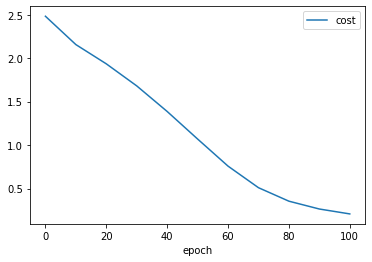

In [3]:


model = nn.Sequential(
    nn.Linear(64, 32),  # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16),  # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10)  # hidden_layer3 = 16, output_layer = 10
)

mu.log("model", model)

X = digits.data  # 이미지. 즉, 특성 행렬
Y = digits.target  # 각 이미지에 대한 레이블

mu.log("len(X)", len(X))
mu.log("X[0].shape", X[0].shape)
mu.log("len(Y)", len(Y))
mu.log("Y[0].shape", Y[0].shape)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
nb_epochs = 100
mu.plt_init()

for epoch in range(nb_epochs + 1):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        mu.log_epoch(epoch, nb_epochs, loss)

mu.plt_show()
